In [1]:
import contextily as cx
import nivapy3 as nivapy
import pandas as pd

# Catchment areas for Norwegian rivers

`martini_rivers_stations_v2.xlsx` was sent by Phil in e-mail received 01.11.2023 at 12.25.

In [2]:
xl_path = r"../data/martini_rivers_stations_v2.xlsx"
df = pd.read_excel(xl_path).dropna(subset="station_id")

# Get just stations in Norway
mask = ~df["station_id"].str.startswith(("o", "m"))
df = df[mask]

df.head()

,station,station_id,station_name,station_lat,station_lon,river,catchment_area_km2,model_river
6,7,vm001,"Tista, utløp Femsjøen",59.1278,11.4443,7,NaN,7
7,8,vm002,Glomma ved Sarpsfoss,59.2779,11.1342,8,NaN,8
8,9,vm002,Glomma ved Sarpsfoss,59.2779,11.1342,9,NaN,9
9,10,vm002,Glomma ved Sarpsfoss,59.2779,11.1342,10,NaN,10
10,11,vm002,Glomma ved Sarpsfoss,59.2779,11.1342,11,NaN,11


In [3]:
# Derive catchments
gdf = nivapy.spatial.derive_watershed_boundaries(
    df,
    id_col="station",
    xcol="station_lon",
    ycol="station_lat",
    crs="epsg:4326",
    min_size_km2=10,
    dem_res_m=40,
    buffer_km=None,
    temp_fold=None,
    reproject=False,
)
gdf.head()

Connection successful.


Looping over vassdragsområder:   0%|          | 0/25 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 001:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 002:   0%|          | 0/6 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 003:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 004:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 005:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 006:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 007:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 008:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 009:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 010:   0%|          | 0/3 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 011:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 012:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 013:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 014:   0%|          | 0/2 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 015:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 016:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 017:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 018:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 019:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 020:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 021:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 022:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 023:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 024:   0%|          | 0/1 [00:00<?, ?it/s]

Looping over outlets in vassdragsområder 025:   0%|          | 0/1 [00:00<?, ?it/s]

,station,geometry,station_id,station_name,station_lat,station_lon,river,catchment_area_km2,model_river
0,7,"MULTIPOLYGON (((315840.000 6552480.000, 315840...",vm001,"Tista, utløp Femsjøen",59.1278,11.4443,7,NaN,7
1,8,"MULTIPOLYGON (((305360.000 6656400.000, 305360...",vm002,Glomma ved Sarpsfoss,59.2779,11.1342,8,NaN,8
2,9,"MULTIPOLYGON (((305360.000 6656400.000, 305360...",vm002,Glomma ved Sarpsfoss,59.2779,11.1342,9,NaN,9
3,10,"MULTIPOLYGON (((305360.000 6656400.000, 305360...",vm002,Glomma ved Sarpsfoss,59.2779,11.1342,10,NaN,10
4,11,"MULTIPOLYGON (((305360.000 6656400.000, 305360...",vm002,Glomma ved Sarpsfoss,59.2779,11.1342,11,NaN,11


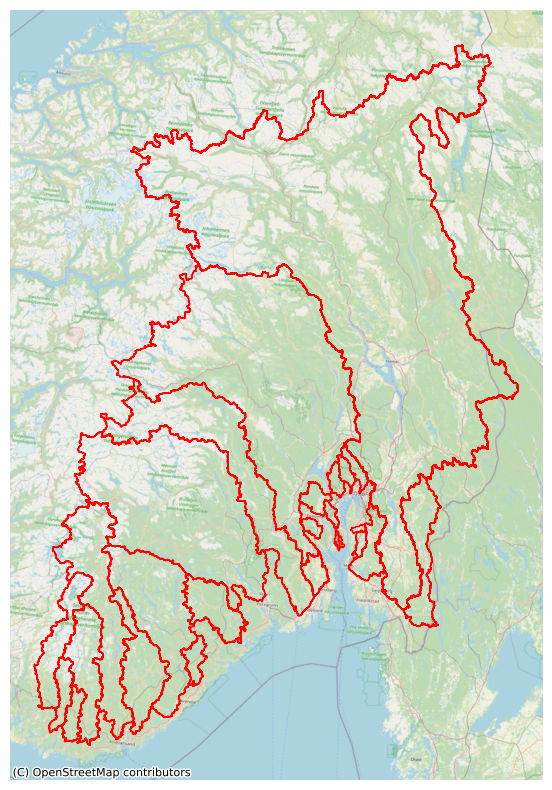

In [4]:
# Plot
ax = gdf.plot(figsize=(10, 10), edgecolor="r", facecolor="none")
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

In [5]:
gdf["area_km2"] = (gdf.to_crs({"proj": "cea"}).geometry.area / 1e6).round(2)
df = gdf.drop('geometry', axis='columns')[list(df.columns) + ['area_km2']]

xl_path = r"../data/norwegian_martini_rivers_with_areas.xlsx"
df.to_excel(xl_path, index=False)

df.head()

,station,station_id,station_name,station_lat,station_lon,river,catchment_area_km2,model_river,area_km2
0,7,vm001,"Tista, utløp Femsjøen",59.1278,11.4443,7,NaN,7,1573.73
1,8,vm002,Glomma ved Sarpsfoss,59.2779,11.1342,8,NaN,8,41596.90
2,9,vm002,Glomma ved Sarpsfoss,59.2779,11.1342,9,NaN,9,41596.90
3,10,vm002,Glomma ved Sarpsfoss,59.2779,11.1342,10,NaN,10,41596.90
4,11,vm002,Glomma ved Sarpsfoss,59.2779,11.1342,11,NaN,11,41596.90
